 **APRENDIZADO DE MÁQUINA** 

---

Instituto Metrópole Digital - IMD/UFRN

T01 (2021.1)

---
Professores: Anne Magaly e João Carlos Xavier 


Aluna: [Júlia Neves Guardiani](https://github.com/juliaguardiani), 20200000705


# Introdução

Importações necessárias:

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/juliaguardiani/AprendizadoDeMaquina/main/Movie_Dataset.csv')
df.head()

,country_release,language,filming_location,year_release,director_gender,director_country,director_year_birth,company_city,founded,company_type,actor_education,actor_gender,actor_nationality,roletype,actor_year_birth
0,BRAZIL,BILINGUAL,CHINA,0.961,M,ENGLAND,0.894,BURBANK,0.061,FILM_PRODUCTION,COMP-SCNDRY,MALE,WELSH,DETECTIVE,0.775
1,BRAZIL,BILINGUAL,CHINA,0.961,M,ENGLAND,0.894,BURBANK,0.061,FILM_PRODUCTION,INCOMP-SCNDRY,MALE,AUSTRALIAN,COWBOY,0.817
2,USA,ENGLISH,MOROCCO,0.855,M,ENGLAND,0.543,BURBANK,0.828,FILM_PRODUCTION,COMP-SCNDRY,MALE,NEW_ZEALANDER,HERO,0.692
3,USA,ENGLISH,MOROCCO,0.855,M,ENGLAND,0.543,BURBANK,0.828,FILM_PRODUCTION,COMP-SCNDRY,MALE,PUERTO_RICAN,VILLAIN,0.775
4,BAHRAIN,BILINGUAL,ENGLAND,0.974,M,ENGLAND,0.872,BURBANK,0.061,FILM_PRODUCTION,COMP-SCNDRY,MALE,AMERICAN,HERO,0.700


In [7]:
dfAtt= df.loc[:,['country_release', 'language', 'filming_location', 'director_gender', 'director_country', 'company_city', 'company_type', 'actor_education','actor_gender', 'actor_nationality', 'roletype']]
dfAtt = pd.get_dummies(data=dfAtt,columns=['country_release', 'language', 'filming_location','director_gender', 'director_country','company_city', 'company_type', 'actor_education','actor_gender', 'actor_nationality', 'roletype'])
dfAtt['year_release'] = df['year_release']
dfAtt['director_year_birth'] = df['director_year_birth']
dfAtt['founded'] = df['founded'] 
dfAtt['actor_year_birth'] = df['actor_year_birth']

Obs: Comecei pelo Hierárquico, como visto em sala, e depois fui trocando as funções. Se o Hierárquico estiver errado, provavelmente eu errei todo o resto.

Obs2: Utilizei o método do cotovelo para todas as funções.

# KMeans

[0.07378188487623125, 0.07294382378524453, 0.05754980160779265, 0.06310479951479953, 0.056620530183997375, 0.06857713038393219, 0.0669459008360645, 0.060056681085205725, 0.05767401141939433, 0.05456455920701076, 0.05591217148302544, 0.055743061365234776, 0.056899273781296444, 0.05654694424397987, 0.05830391056319138, 0.06232240129715423, 0.059753841550986155, 0.060803149794791414, 0.06072270134250868]


Text(0.5, 1.0, 'Silhouette')

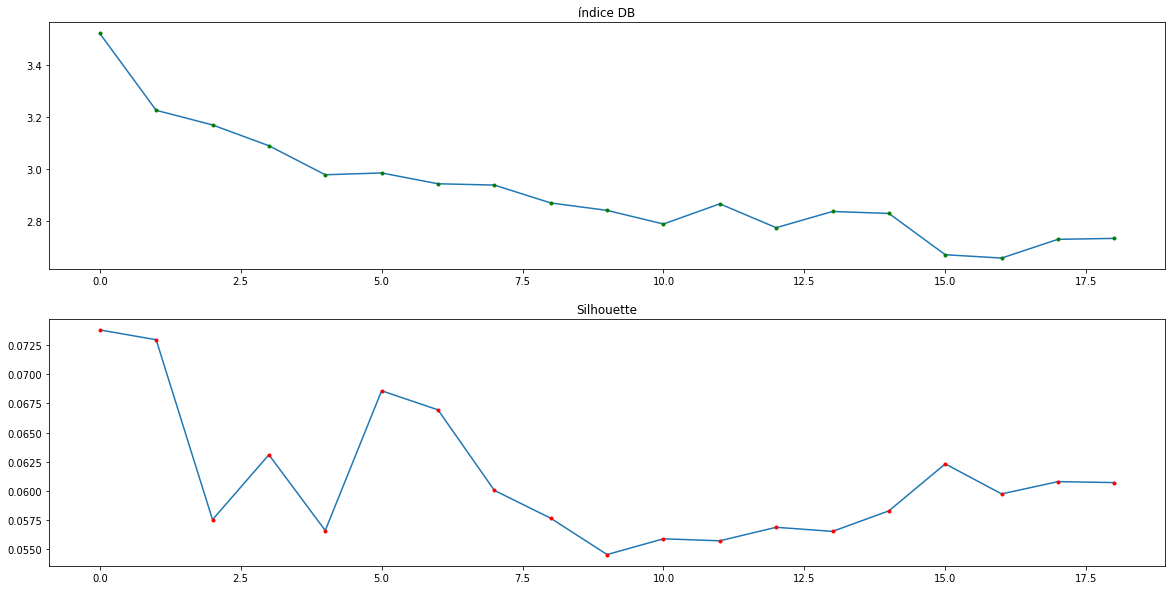

In [11]:
ldb = []
ls = []

for i in range(2,21,1):  #o variar o valor de k de 2 até 20
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(dfAtt)
  labels =kmeans.labels_
  ldb.append(davies_bouldin_score(dfAtt, labels))
  ls.append(silhouette_score(dfAtt, labels))

print(ls)
#Obs: os gráficos começam em 0, mas esse 0 é o índice do vetor, só. O x dos gráficos são os números de clusters de 2 a 20.

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(ldb)
plt.plot(ldb,'g.')
plt.title("Índice DB")

plt.subplot(2,1,2)
plt.plot(ls)
plt.plot(ls,'r.')
plt.title("Silhouette")

# AgglomerativeClustering

[0.05254521735690267, 0.043979110566576045, 0.03921129479085721, 0.03671771700302547, 0.03861582968292741, 0.03137264876924885, 0.037286743349750545, 0.029790430624152535, 0.03210381269020518, 0.03443844427533115, 0.03878413010447371, 0.029670926229103455, 0.031072357483336754, 0.030852030524580396, 0.03364410832890799, 0.03699309490746106, 0.03921184313203289, 0.040455927546942494, 0.037754613805317555]


Text(0.5, 1.0, 'Silhouette')

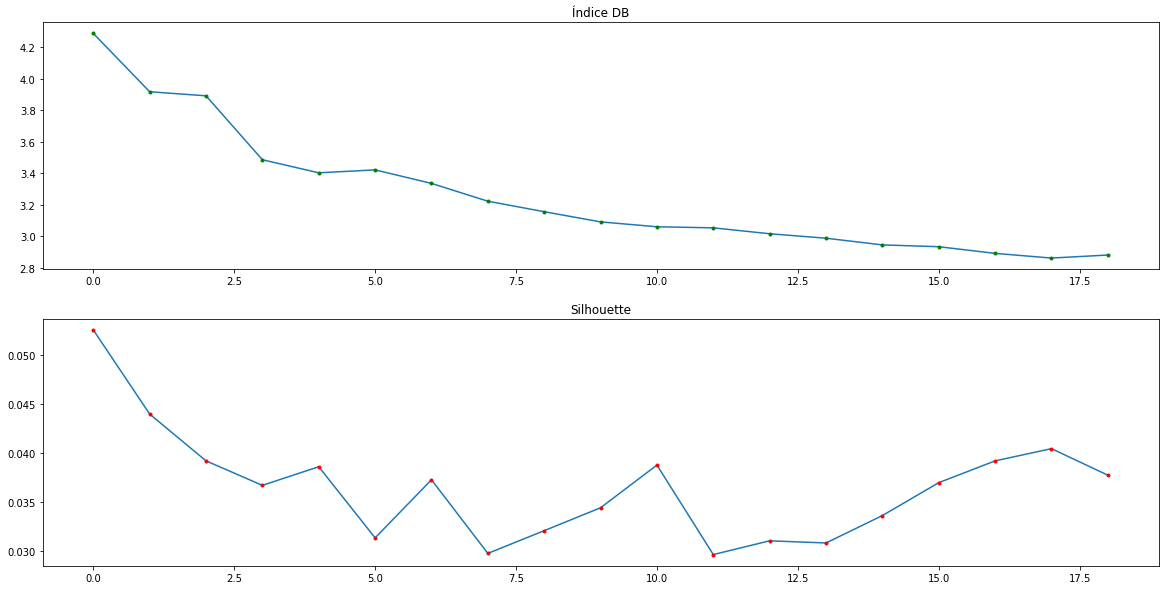

In [29]:
ls = []
ldb = []

for i in range(2,21,1):
  HC = AgglomerativeClustering(n_clusters=i)
  HC.fit(dfAtt)
  labels = HC.labels_
  ldb.append(davies_bouldin_score(dfAtt, labels))
  ls.append(silhouette_score(dfAtt, labels))

print(ls)

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(ldb)
plt.plot(ldb,'g.')
plt.title("Índice DB")

plt.subplot(2,1,2)
plt.plot(ls)
plt.plot(ls,'r.')
plt.title("Silhouette")

# GaussianMixture

[0.07378188487623125, 0.0703002905563348, 0.05698991619507274, 0.0617585321341789, 0.06033114619906297, 0.023450845345030547, 0.035616177314613306, 0.043955041253910344, 0.05653659617076977, 0.0562370670004196, 0.031153447047584448, 0.04269770430647269, 0.05023965010035271, 0.05984013273869053, 0.06489639345961407, 0.037089901154639116, 0.06409516991165247, 0.06010894656574034, 0.05446002491516022]


Text(0.5, 1.0, 'Silhouette')

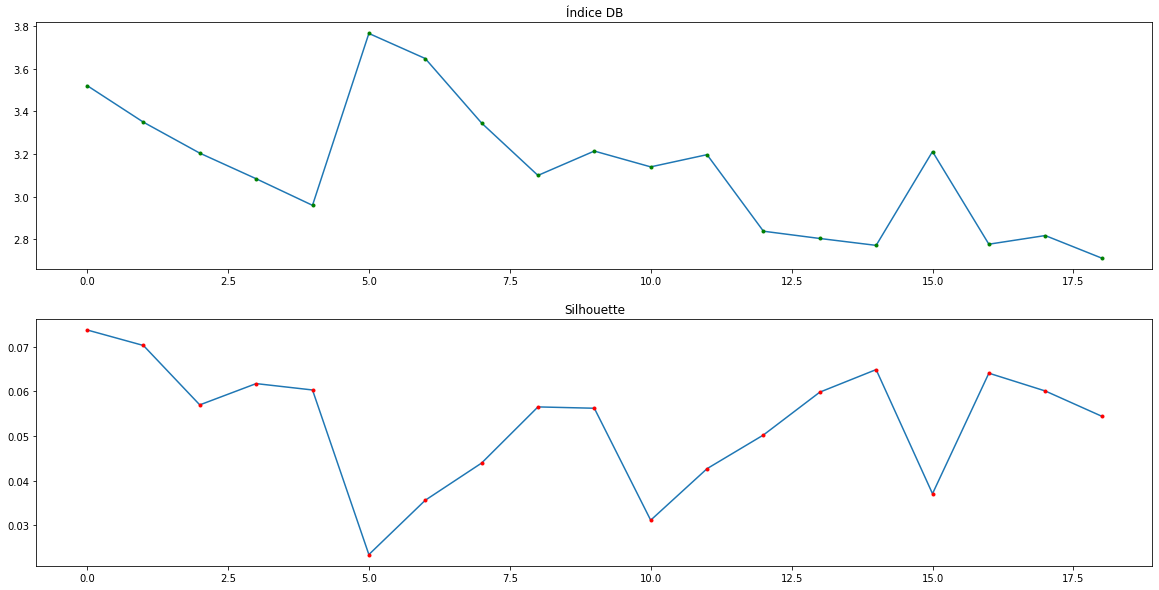

In [26]:
from sklearn import mixture #Só assim consegui utilizar o mixture.

ls = []
ldb = []

for i in range(2,21,1):
    clusterer= mixture.GaussianMixture(n_components=i, covariance_type ='full')
    #clusterer = mixture.GaussianMixture(n_components=i, covariance_type='full')
    clusterer.fit(dfAtt)
    labels=clusterer.predict(dfAtt)
    ldb.append(davies_bouldin_score(dfAtt, labels))
    ls.append(silhouette_score(dfAtt, labels))

print(ls)

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(ldb)
plt.plot(ldb,'g.')
plt.title("Índice DB")

plt.subplot(2,1,2)
plt.plot(ls)
plt.plot(ls,'r.')
plt.title("Silhouette")

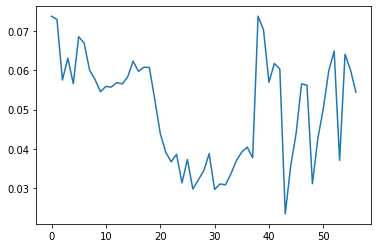

In [28]:
total = [0.07378188487623125, 0.07294382378524453, 0.05754980160779265, 0.06310479951479953, 0.056620530183997375, 0.06857713038393219, 0.0669459008360645, 0.060056681085205725, 0.05767401141939433, 0.05456455920701076, 0.05591217148302544, 0.055743061365234776, 0.056899273781296444, 0.05654694424397987, 0.05830391056319138, 0.06232240129715423, 0.059753841550986155, 0.060803149794791414, 0.06072270134250868, 
         0.05254521735690267, 0.043979110566576045, 0.03921129479085721, 0.03671771700302547, 0.03861582968292741, 0.03137264876924885, 0.037286743349750545, 0.029790430624152535, 0.03210381269020518, 0.03443844427533115, 0.03878413010447371, 0.029670926229103455, 0.031072357483336754, 0.030852030524580396, 0.03364410832890799, 0.03699309490746106, 0.03921184313203289, 0.040455927546942494, 0.037754613805317555,
         0.07378188487623125, 0.0703002905563348, 0.05698991619507274, 0.0617585321341789, 0.06033114619906297, 0.023450845345030547, 0.035616177314613306, 0.043955041253910344, 0.05653659617076977, 0.0562370670004196, 0.031153447047584448, 0.04269770430647269, 0.05023965010035271, 0.05984013273869053, 0.06489639345961407, 0.037089901154639116, 0.06409516991165247, 0.06010894656574034, 0.05446002491516022]
plt.plot(total)

# Inferências sobre os resultados



1.   Quais foram as melhores partições geradas pelo k-means baseado nos índices de validação (DB e Silhouette)?

    Resposta: Para ocorrer uma concordância entre os dois métodos, o valor seria por volta de 7 para o k ideal.

2.   Quais foram as melhores partições geradas pelo Hierárquico baseado nos
índices de validação?

    Resposta: 6 (como valor que se repete nos dois clusters).
  

3.   Quais foram as melhores partições geradas pelo EM baseado nos índices de
validação?

    Resposta: Não achei  concordância com ambos os métodos, assim, não consegui identificar o melhor valor, apontaria por volta dos 7,5.








